In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt1=pd.read_csv('titanic/train.csv')
dt2=pd.read_csv('titanic/test.csv')
dt3=pd.read_csv('titanic/gender_submission.csv')
dt2=pd.merge(dt2,dt3,on='PassengerId')
dt=pd.concat([dt1,dt2])

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt.info()
dt.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
dt.fillna({'Age':dt['Age'].mean(),'Embarked':dt['Embarked'].mode()[0]},inplace=True)
dt['Age']=dt['Age'].astype(int)
dt.drop(columns=['PassengerId','Name','Cabin','Ticket'],inplace=True)

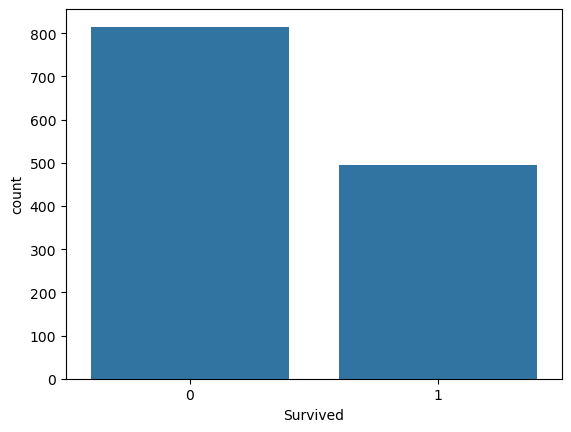

In [6]:
# Survived vs Count
sns.countplot(data=dt,x='Survived')
plt.show()

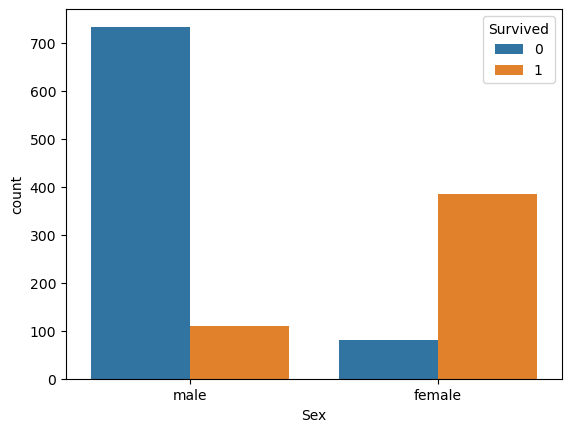

In [12]:
# Sex vs Survived_Count
sns.countplot(data=dt,x='Sex',hue='Survived')
plt.show()

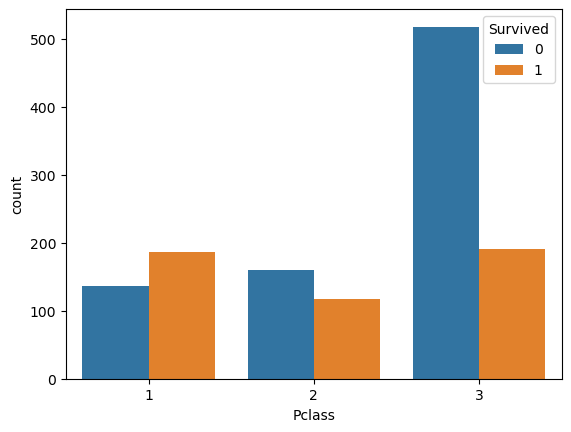

In [13]:
# Pclass vs Survived_Count
sns.countplot(data=dt,x='Pclass',hue='Survived')
plt.show()

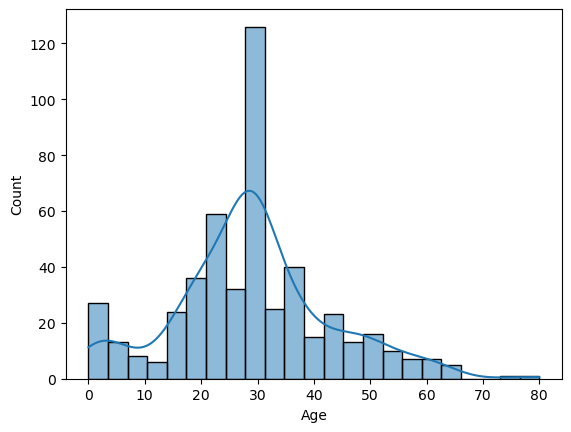

In [14]:
# Survivers Count over Age group
age_dt=dt[dt['Survived']==1]
sns.histplot(data=age_dt,x='Age',kde=True)
plt.show()

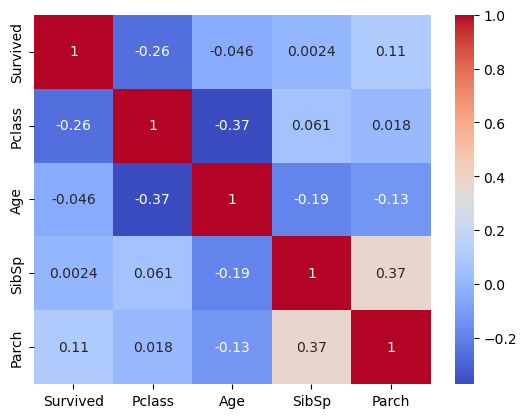

In [15]:
sns.heatmap(dt.select_dtypes('int').corr(), annot=True, cmap='coolwarm')
plt.show()

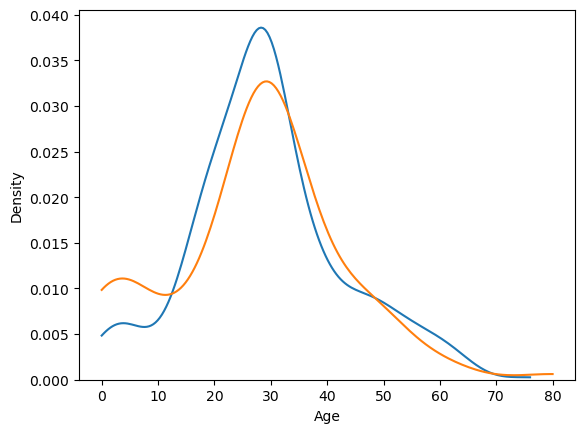

In [16]:
female_age=dt.query('Sex=="female" and Survived==1')
male_age=dt.query('Sex=="male" and Survived==1')
sns.kdeplot(data=female_age,x='Age',clip=(0,female_age['Age'].max()))
sns.kdeplot(data=male_age,x='Age',clip=(0,male_age['Age'].max()))
plt.show()